In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
#to check missing values in the data

df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [10]:
#to check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [11]:
#to count no of missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<Axes: xlabel='Channel', ylabel='Milk'>

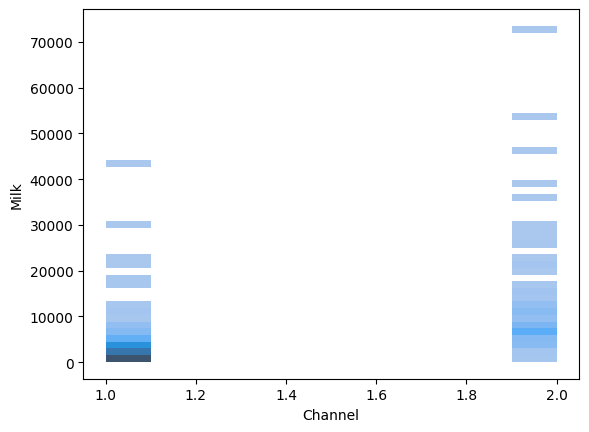

In [13]:
sns.histplot(x=df['Channel'], y=df['Milk'])


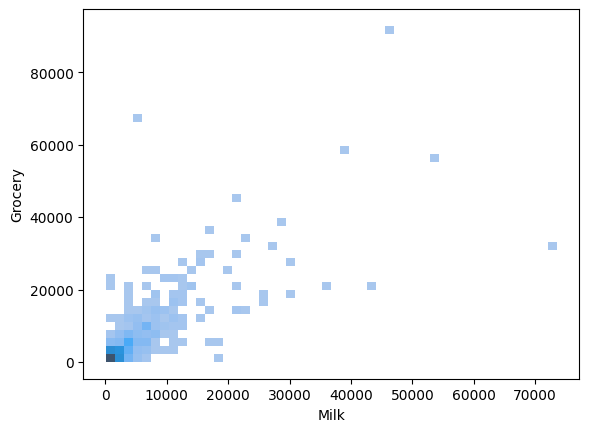

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.histplot(x=df['Milk'], y=df['Grocery'])
plt.show()


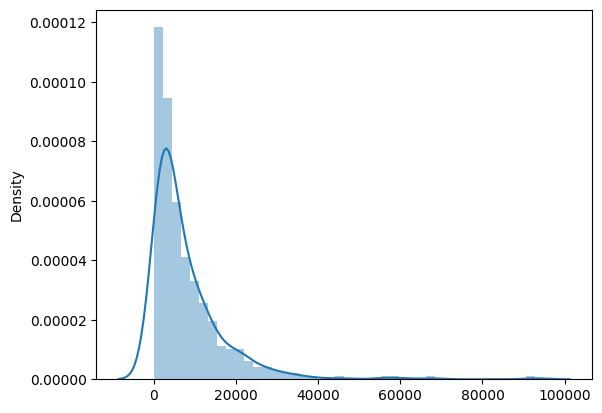

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=df['Grocery'])
plt.show()


In [16]:
from sklearn.preprocessing  import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [17]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]], shape=(440, 8))

In [18]:
import scipy.cluster.hierarchy as sch

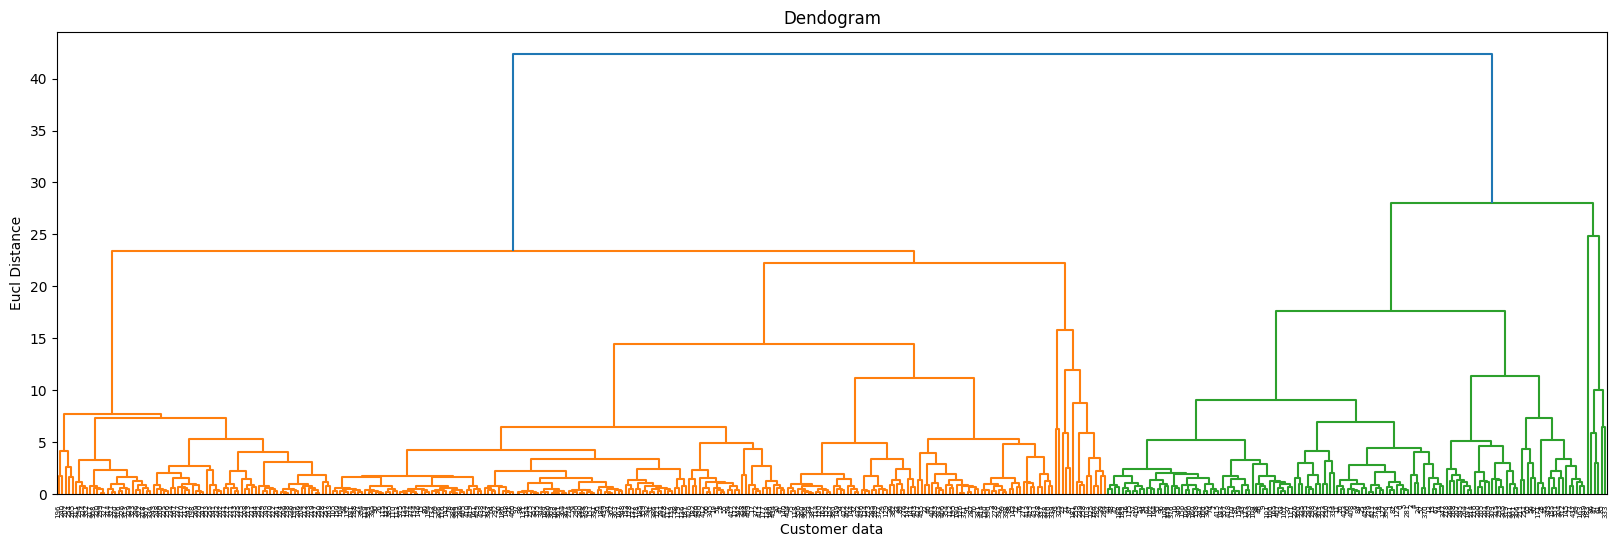

In [19]:
plt.figure(figsize=(20,6))
dendo=  sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [20]:
len(set(dendo['color_list']))-1

2

In [21]:
from sklearn.cluster import AgglomerativeClustering


In [22]:
model = AgglomerativeClustering(n_clusters=2)
cluster=model.fit_predict(X)

In [23]:
cluster

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [24]:
group_num=pd.DataFrame(cluster, columns=['Group'])
group_num

,Group
0,0
1,0
2,0
3,1
4,0
...,...
435,1
436,1
437,0
438,1


In [25]:
cust_group_data=pd.concat([df,  group_num],axis=1)
cust_group_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [26]:

from sklearn.metrics import silhouette_score

silhouette_score(X, cluster)

np.float64(0.3680209405194812)

In [27]:
X = np.random.rand(50, 2)
X


array([[0.39636179, 0.54917344],
       [0.4025075 , 0.23317081],
       [0.66589227, 0.86314003],
       [0.59549214, 0.88686531],
       [0.26122612, 0.00810704],
       [0.81579167, 0.55108091],
       [0.45151295, 0.59096991],
       [0.36570403, 0.67201885],
       [0.25504503, 0.06962251],
       [0.08343357, 0.95001643],
       [0.09815177, 0.3921101 ],
       [0.63942263, 0.01766717],
       [0.57590472, 0.60359757],
       [0.90609215, 0.02353487],
       [0.30851762, 0.29797666],
       [0.9696698 , 0.87587842],
       [0.42184666, 0.55974191],
       [0.17506143, 0.25136227],
       [0.93593044, 0.21273491],
       [0.76249835, 0.11130983],
       [0.88975777, 0.03363676],
       [0.69330196, 0.22832834],
       [0.95826033, 0.41796475],
       [0.12542118, 0.73830914],
       [0.03025055, 0.67571007],
       [0.71155718, 0.32195183],
       [0.18835183, 0.79968237],
       [0.03035721, 0.69663111],
       [0.23384501, 0.93226919],
       [0.5399612 , 0.9664782 ],
       [0.

In [28]:
from sklearn.cluster import KMeans
import numpy as np

# Generating random data (50 samples, 2 features)
X = np.random.rand(50, 2)

 # List to store Within-Cluster Sum of Squares (WCSS)
wcss = [ ]
 
for i in range(2, 11):
    kMeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  
    kMeans.fit(X)  
    wcss.append(kMeans.inertia_) 
wcss


[4.2209278049764825,
 2.8870321066934808,
 1.5651079430972166,
 1.2763761974834653,
 1.172765350853844,
 0.9480698699184165,
 0.771658409680547,
 0.6747295627234603,
 0.5087859937886424]

In [32]:
wcss

[4.2209278049764825,
 2.8870321066934808,
 1.5651079430972166,
 1.2763761974834653,
 1.172765350853844,
 0.9480698699184165,
 0.771658409680547,
 0.6747295627234603,
 0.5087859937886424]

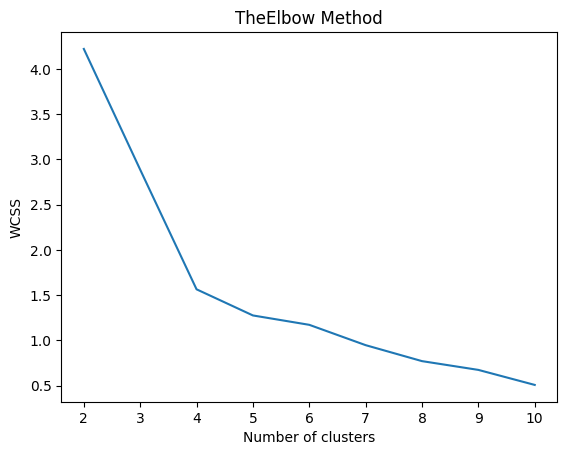

In [33]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.plot(range(2, 11), wcss)
plt.title('TheElbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
#Fitting K-Means to the dataset
model = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(X)


In [44]:
groups

array([0, 3, 3, 1, 1, 0, 4, 2, 4, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 4, 1, 4,
       4, 3, 2, 0, 0, 3, 3, 1, 1, 1, 2, 1, 3, 1, 2, 0, 1, 0, 4, 4, 4, 0,
       0, 1, 1, 2, 3, 1], dtype=int32)

In [45]:
groups.shape

(50,)

In [46]:
group_num = pd.DataFrame(groups, columns=['Group'])
group_num

,Group
0,0
1,3
2,3
3,1
4,1
5,0
6,4
7,2
8,4
9,3


In [42]:
cust_KMeans= pd.concat([df, group_num], axis=1)
cust_KMeans

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,2,3,12669,9656,7561,214,2674,1338,0.0
1,2,3,7057,9810,9568,1762,3293,1776,3.0
2,2,3,6353,8808,7684,2405,3516,7844,3.0
3,1,3,13265,1196,4221,6404,507,1788,1.0
4,2,3,22615,5410,7198,3915,1777,5185,3.0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,NaN
436,1,3,39228,1431,764,4510,93,2346,NaN
437,2,3,14531,15488,30243,437,14841,1867,NaN
438,1,3,10290,1981,2232,1038,168,2125,NaN


In [49]:
silhouette_score(X, groups)

np.float64(0.3947743579837488)